In [30]:
!pip install xgboost

     |████████████████████████████████| 1.8 MB 2.3 MB/s eta 0:00:01


In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [39]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [41]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
round(data.isnull().sum()/len(data)*100,2)

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [43]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

No percentage of null and the datatypes are correct for each column. 

In [44]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

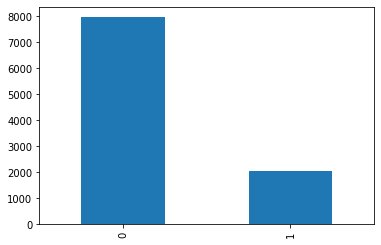

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

p=data.churn.value_counts().plot(kind="bar")
p

In [46]:
import plotly.express as ex

ex.pie(data,names='gender')

In [47]:
ex.pie(data,names='country')

In [48]:
ex.pie(data,names='churn')

In [49]:
print(data['country'].unique())
print(data.columns)
print(data["gender"].unique())

['France' 'Spain' 'Germany']
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
['Female' 'Male']


In [50]:
data['country'] = data['country'].replace(['France'],0)
data['country'] = data['country'].replace(['Spain'],1)
data['country'] = data['country'].replace(['Germany'],2)

data['gender'] = data['gender'].replace(['Female'],0)
data['gender'] = data['gender'].replace(['Male'],1)

data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [51]:
data.drop('customer_id', axis = 1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [52]:
data['country'] = pd.to_numeric(data['country'])
data['gender'] = pd.to_numeric(data['gender'])

In [53]:
data.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

<AxesSubplot:>

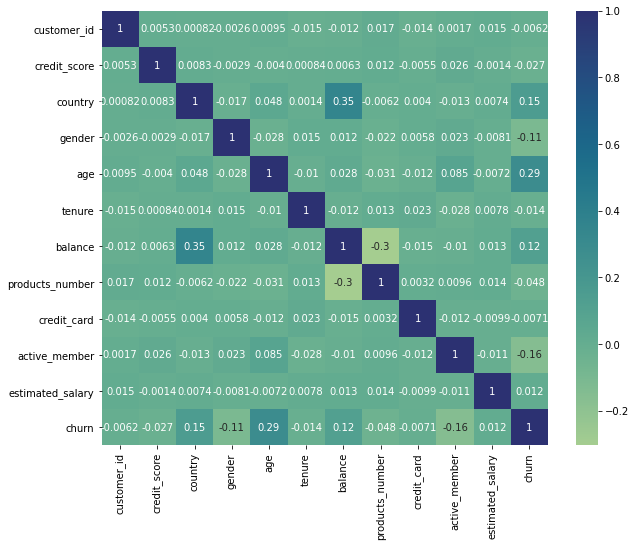

In [54]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(data.corr(), fmt='.2g',cmap = "crest", annot = True,ax = ax)

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop('churn', axis = 1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictions = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))

Accuracy Score: 0.859


In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.78      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



[[1534   51]
 [ 231  184]]


<AxesSubplot:>

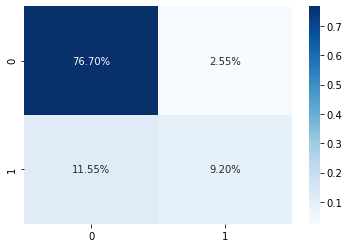

In [60]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [61]:
import xgboost as xgb

In [62]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
xgb_pred = xgb_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

Accuracy Score: 0.8605
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1585
           1       0.74      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



[[1512   73]
 [ 206  209]]


<AxesSubplot:>

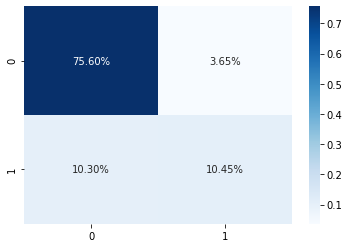

In [64]:
cf_matrix_1 = confusion_matrix(y_test, xgb_pred)
print(cf_matrix_1)

import seaborn as sns
sns.heatmap(cf_matrix_1/np.sum(cf_matrix_1), annot=True, 
            fmt='.2%', cmap='Blues')

In [65]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [66]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Accuracy Score: 0.8595
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.85      0.39      0.54       415

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



[[1556   29]
 [ 252  163]]


<AxesSubplot:>

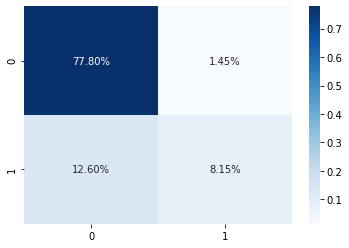

In [67]:
cf_matrix_2 = confusion_matrix(y_test, y_pred_svc)
print(cf_matrix_2)

import seaborn as sns
sns.heatmap(cf_matrix_2/np.sum(cf_matrix_2), annot=True, 
            fmt='.2%', cmap='Blues')